# Visualization of the Reference Data
### The Quest for Raw Signals:<br>A Quality Review of Publicly Available Photoplethysmography Datasets

Florian Wolling<br>
Ubiquitous Computing Lab<br>
https://ubicomp.eti.uni-siegen.de<br>
University of Siegen, Germany<br>

### Citation
"[The Quest for Raw Signals: A Quality Review of Publicly Available Photoplethysmography Datasets](https://ubicomp.eti.uni-siegen.de/home/datasets/data20/index.html.en)", <a href="https://ubicomp.eti.uni-siegen.de/home/team/fwolling.html.en" target="_blank">Florian Wolling</a> and <a href="https://ubicomp.eti.uni-siegen.de/home/team/kristof.html.en" target="_blank">Kristof Van Laerhoven</a>. In *DATA'20: Proceedings of the 3rd Workshop on Data Acquisition To Analysis, DATA 2020, Virtual Event, Japan, November 2020*, ACM, 2020. <a href="https://doi.org/10.1145/3419016.3431485" target="_blank">https://doi.org/10.1145/3419016.3431485</a>

### Disclaimer
You may use the source code of the developed analytical tool *PPGraw* for scientific, non-commercial purposes, provided that you give credit to the owners when publishing any work based on it. We would also be very interested to hear back from you if you use our tool or metrics in any way and are happy to answer any questions or address any remarks related to it.

<br>
<b>Version 1.0</b> (November 2020)

In [1]:
import pickle
import numpy as np
import scipy.signal as sig
import matplotlib.pyplot as plt
%matplotlib inline

# Hide warnings such as FutureWarning.
import warnings
warnings.filterwarnings('ignore')

# Load the raw, unfiltered reference data.
file = "ref_sample.p"
data = pickle.load(open(str(file), "rb"), encoding="latin1")

In [2]:
# Plot function for the PPG signal time series.
def plot_signal(time, signal, width=20.0, height=5.0, title=None, xlabel=None, ylabel=None):
    fig=plt.figure(figsize=(width, height))
    ax=plt.axes()
    ax.set_title(title, fontsize=14)
    ax.set_xlabel(xlabel, fontsize=12)
    ax.set_ylabel(ylabel, fontsize=12)
    ax.set_xlim((min(time), max(time)))
    ax.plot(time, signal)

### Plot of the Raw, Unfiltered Reference Data

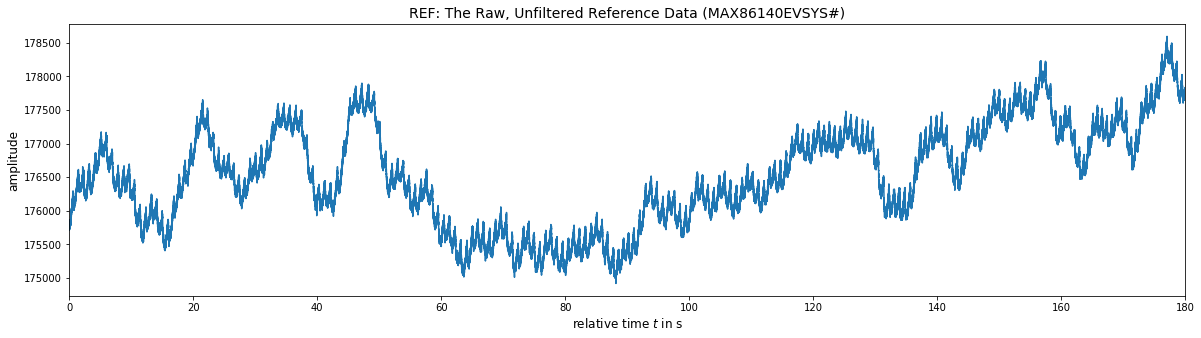

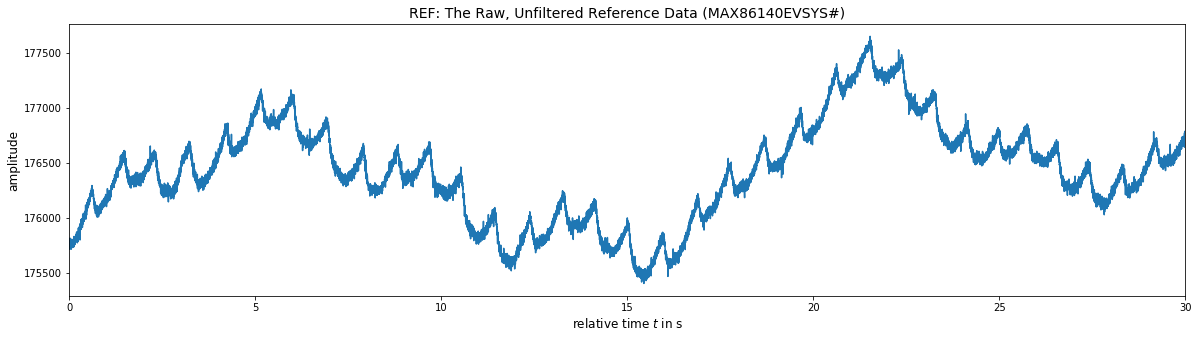

In [3]:
# Plot full time series.
plot_signal(data["time"], data["signal"],
            title="REF: The Raw, Unfiltered Reference Data (MAX86140EVSYS#)",
            xlabel="relative time $t$ in s", ylabel="amplitude")
# Plot excerpt from time series.
bgn = int(round( 0.0  * data["fs"]))  # Index of the excerpt's begin.
end = int(round( 30.0 * data["fs"]))  # Index of the excerpt's end.
plot_signal(data["time"][bgn:end], data["signal"][bgn:end],
            title="REF: The Raw, Unfiltered Reference Data (MAX86140EVSYS#)",
            xlabel="relative time $t$ in s", ylabel="amplitude")
plt.show()

In [4]:
def lowpass(data, fs, order, fc):
    nyq = 0.5 * fs  # Calculate the Nyquist frequency.
    cut = fc / nyq  # Calculate the cutoff frequency (-3 dB).
    lp_b, lp_a = sig.butter(order, cut, btype='lowpass')  # Design and apply the low-pass filter.
    lp_data = list(sig.filtfilt(lp_b, lp_a, data))  # Apply forward-backward filter with linear phase.
    return lp_data

def highpass(data, fs, order, fc):
    nyq = 0.5 * fs  # Calculate the Nyquist frequency.
    cut = fc / nyq  # Calculate the cutoff frequency (-3 dB).
    hp_b, hp_a = sig.butter(order, cut, btype='highpass')  # Design and apply the high-pass filter.
    hp_data = list(sig.filtfilt(hp_b, hp_a, data))  # Apply forward-backward filter with linear phase.
    return hp_data

def bandpass(data, fs, order, fc_low, fc_hig):
    nyq = 0.5 * fs  # Calculate the Nyquist frequency.
    cut_low = fc_low / nyq  # Calculate the lower cutoff frequency (-3 dB).
    cut_hig = fc_hig / nyq  # Calculate the upper cutoff frequency (-3 dB).
    bp_b, bp_a = sig.butter(order, (cut_low, cut_hig), btype='bandpass')  # Design and apply the band-pass filter.
    bp_data = list(sig.filtfilt(bp_b, bp_a, data))  # Apply forward-backward filter with linear phase.
    return bp_data

### Plot of the Filtered Reference Data:<br>2nd Order Low-pass filter, 15.0 Hz Corner Frequency

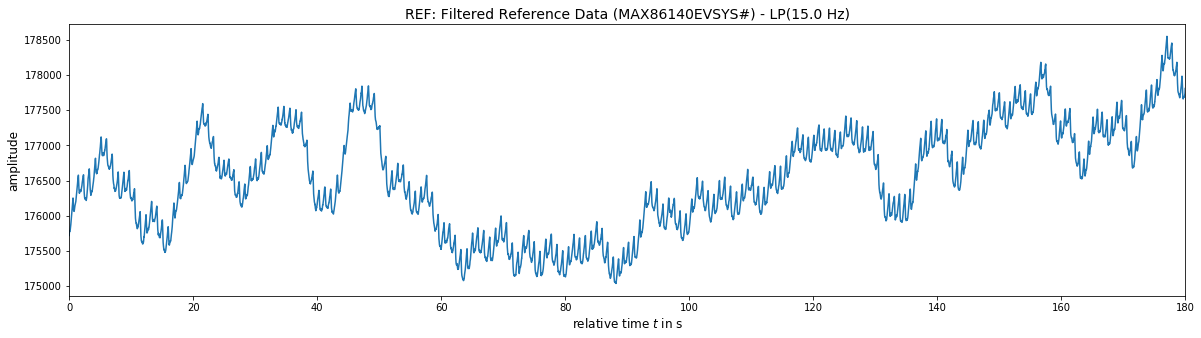

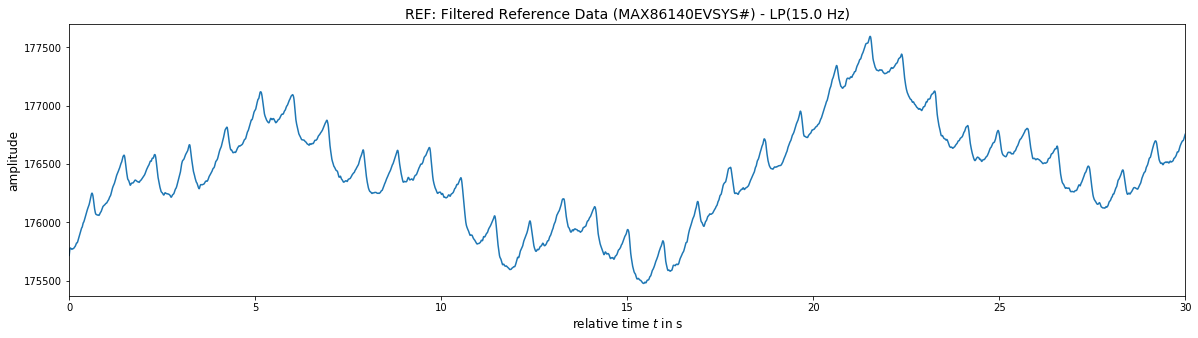

In [5]:
lp_fc = 15.0  # The filter's corner frequency.
lp_order = 2  # The filter's order.

signal_lp = lowpass(data["signal"], fs=data["fs"], order=lp_order, fc=lp_fc)

# Plot full time series.
plot_signal(data["time"], signal_lp,
            title="REF: Filtered Reference Data (MAX86140EVSYS#) - LP(" + str(round(lp_fc, 1)) + " Hz)",
            xlabel="relative time $t$ in s", ylabel="amplitude")
# Plot excerpt from time series.
bgn = int(round( 0.0  * data["fs"]))  # Index of the excerpt's begin.
end = int(round( 30.0 * data["fs"]))  # Index of the excerpt's end.
plot_signal(data["time"][bgn:end], signal_lp[bgn:end],
            title="REF: Filtered Reference Data (MAX86140EVSYS#) - LP(" + str(round(lp_fc, 1)) + " Hz)",
            xlabel="relative time $t$ in s", ylabel="amplitude")
plt.show()

### Plot of the Filtered Reference Data:<br>2nd Order High-pass filter, 0.167 Hz Corner Frequency

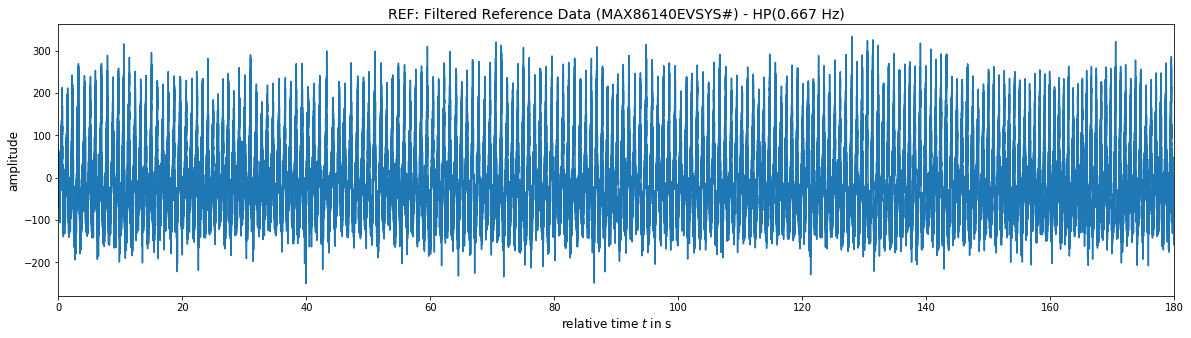

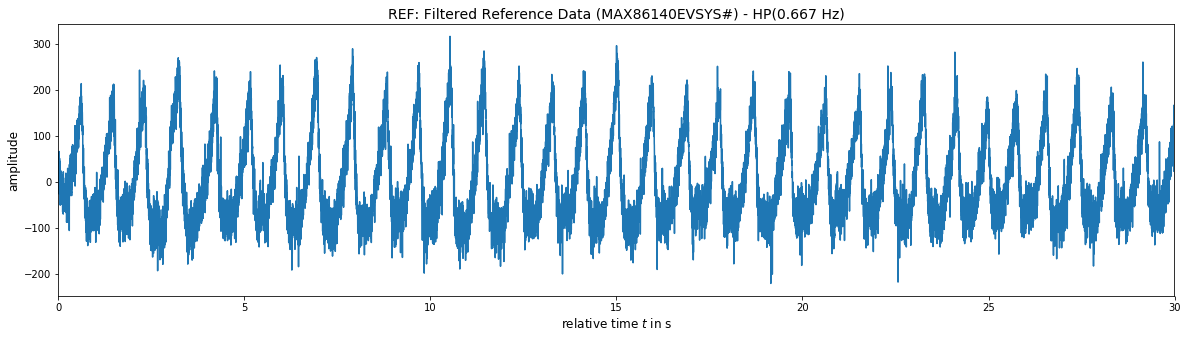

In [6]:
hp_fc = 0.666667  # The filter's corner frequency.
hp_order = 2  # The filter's order.

signal_hp = highpass(data["signal"], fs=data["fs"], order=hp_order, fc=hp_fc)

# Plot full time series.
plot_signal(data["time"], signal_hp,
            title="REF: Filtered Reference Data (MAX86140EVSYS#) - HP(" + str(round(hp_fc, 3)) + " Hz)",
            xlabel="relative time $t$ in s", ylabel="amplitude")
# Plot excerpt from time series.
bgn = int(round( 0.0  * data["fs"]))  # Index of the excerpt's begin.
end = int(round( 30.0 * data["fs"]))  # Index of the excerpt's end.
plot_signal(data["time"][bgn:end], signal_hp[bgn:end],
            title="REF: Filtered Reference Data (MAX86140EVSYS#) - HP(" + str(round(hp_fc, 3)) + " Hz)",
            xlabel="relative time $t$ in s", ylabel="amplitude")
plt.show()

### Plot of the Filtered Reference Data:<br>2nd Order Band-pass filter, 0.167 Hz (lower) and 15.0 Hz (upper) Corner Frequencies

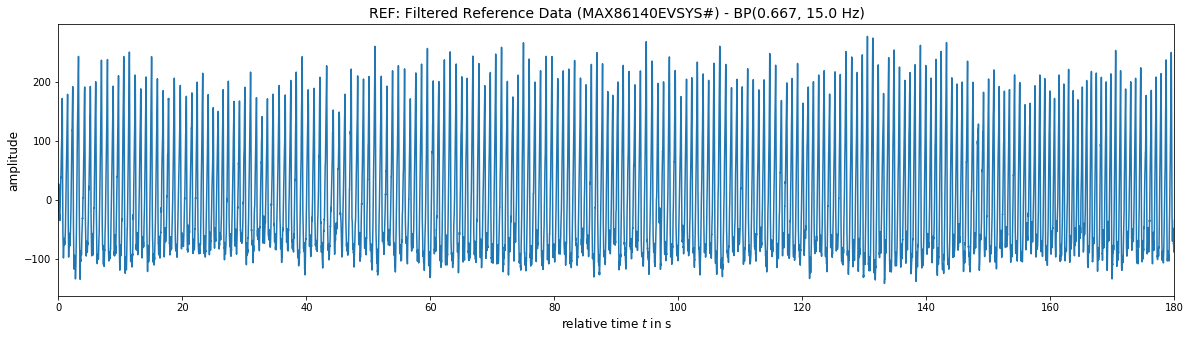

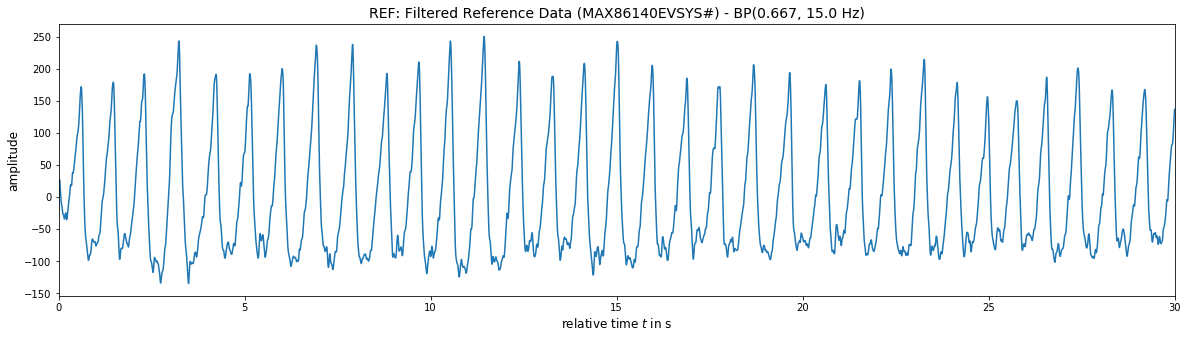

In [7]:
# Plot the reference data filtered: 2nd order band-pass filter, 0.167 Hz lower and 15.0 Hz upper corner frequencies
bp_fc_low = 0.666667  # The filter's lower corner frequency.
bp_fc_hig = 15.0  # The filter's upper corner frequency.
bp_order = 2  # The filter's order.

signal_bp = bandpass(data["signal"], fs=data["fs"], order=bp_order, fc_low=bp_fc_low, fc_hig=bp_fc_hig)

# Plot full time series.
plot_signal(data["time"], signal_bp,
            title="REF: Filtered Reference Data (MAX86140EVSYS#) - BP(" + str(round(bp_fc_low, 3)) + ", " + str(round(bp_fc_hig, 1)) + " Hz)",
            xlabel="relative time $t$ in s", ylabel="amplitude")
# Plot excerpt from time series.
bgn = int(round( 0.0  * data["fs"]))  # Index of the excerpt's begin.
end = int(round( 30.0 * data["fs"]))  # Index of the excerpt's end.
plot_signal(data["time"][bgn:end], signal_bp[bgn:end],
            title="REF: Filtered Reference Data (MAX86140EVSYS#) - BP(" + str(round(bp_fc_low, 3)) + ", " + str(round(bp_fc_hig, 1)) + " Hz)",
            xlabel="relative time $t$ in s", ylabel="amplitude")
plt.show()